# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

Observation1. The findings of these analysis showed that there is a higher temperature for cities that found near to the equator (Latitude 0), however, when we go farther from the equator towards the north the temperature decreases highly. However, when we go to the south the temperature decreases but it is much lower comparing to the north. The regression analysis and plot also showed that there is a strong negative correlation between temperature, and latitude in the northern hemisphere however, the correlation between temperature and latitude in the south Hemisphere is negative but very week to conclude.


Observation2. The findings from the data, plots, and the regression line in the case of testing if there is a relation between humidity and cloudiness of cities nearer or farther to the equator (latitude 0) doesn't show any significant results. The correlation between humidity and latitude for both northern and southern hemisphere cities is very week, negative correlation, and the result for cloudiness and latitude also very week and negative. Therefore, We can infer that humidity can be fairly distributed in both northern and southern hemisphere cities regardless of their distance from the equator.


Observation3. The finding from the analysis of the relationship between wind speed (mph), and latitude showed that the lower wind speed when the cities closer to the equater (latitude 0), and somehow the wind speed increase for the cities farther from the equater. The regression analysis also showed that there is a very week, posetive correlation between Wind Speed (mph (%) and Latitude in the Northern Hemisphere cities.

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
from pprint import pprint

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [3]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

598

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [4]:
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial" 

# List of weather Data on each city
weather_data = []

# Print to logger
print("Beginning Data Retrieval")
print ("-" * 15)

#creating counters
record_count,set_count = 1,1

#Looping through cities to make api calls using city as query
for index, city in enumerate(cities):
    
    #Grouping cities
    if record_count == 50:
        set_count += 1
        record_count = 0
    else:
        record_count += 1
    # Create endpoint URL with each city
    queryURL = f"{url}&appid={weather_api_key}&units={units}&q={city}"
    
     # Parse the JSON and retrieve data
   # weatherResponse = requests.get(queryURL).json()
     #print(f"{city_weatherResponse}")
        
     # Run an API request for each of the cities
    try: 
        weatherResponse = requests.get(queryURL).json()  
        # Parse the JSON and retrieve data
    #weatherResponse = requests.get(queryURL).json()
     #print(f"{city_weatherResponse}")
        
       # Parse out the max temp, humidity, and cloudiness
        city = weatherResponse['name']
        city_lat = weatherResponse["coord"]["lat"]
        city_lng = weatherResponse["coord"]["lon"]
        city_maxtemp = weatherResponse["main"]["temp_max"]
        city_humidity = weatherResponse["main"]["humidity"]
        city_cloudiness = weatherResponse["clouds"]["all"]
        city_windspeed = weatherResponse["wind"]["speed"]
        city_country = weatherResponse["sys"]["country"]
        city_date = weatherResponse["dt"]
          
        # Append the City information into city_data list
        weather_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_maxtemp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_cloudiness,
                          "Wind Speed": city_windspeed,
                          "Country": city_country,
                          "Date": city_date
                         })
        print(f"Processing Record {record_count} of Set {set_count} | {city} ")
    except (KeyError, IndexError):
        print(f"City not found. Skipping...")
        
       
        
weather_data_pd = pd.DataFrame(weather_data)

Beginning Data Retrieval
---------------
Processing Record 2 of Set 1 | Vaini 
Processing Record 3 of Set 1 | Mackay 
Processing Record 4 of Set 1 | Sabang 
Processing Record 5 of Set 1 | Cape Town 
Processing Record 6 of Set 1 | Mar del Plata 
Processing Record 7 of Set 1 | Bambous Virieux 
Processing Record 8 of Set 1 | Olafsvik 
Processing Record 9 of Set 1 | Pevek 
Processing Record 10 of Set 1 | Rikitea 
Processing Record 11 of Set 1 | Punta Arenas 
Processing Record 12 of Set 1 | Yellowknife 
Processing Record 13 of Set 1 | Esperance 
Processing Record 14 of Set 1 | Castro 
City not found. Skipping...
Processing Record 16 of Set 1 | Seymchan 
Processing Record 17 of Set 1 | Longyearbyen 
Processing Record 18 of Set 1 | Bluff 
Processing Record 19 of Set 1 | Lompoc 
Processing Record 20 of Set 1 | Tiksi 
Processing Record 21 of Set 1 | Atuona 
Processing Record 22 of Set 1 | Sargatskoye 
Processing Record 23 of Set 1 | Arraial do Cabo 
Processing Record 24 of Set 1 | Marzuq 
Proce

Processing Record 48 of Set 4 | Raymond 
City not found. Skipping...
Processing Record 50 of Set 4 | Lethem 
Processing Record 0 of Set 5 | Gillette 
Processing Record 1 of Set 5 | Sitka 
Processing Record 2 of Set 5 | Los Llanos de Aridane 
Processing Record 3 of Set 5 | Santiago del Estero 
Processing Record 4 of Set 5 | Razdol'noye 
City not found. Skipping...
Processing Record 6 of Set 5 | Hohhot 
Processing Record 7 of Set 5 | Wanning 
Processing Record 8 of Set 5 | Kalangala 
Processing Record 9 of Set 5 | Alice Springs 
Processing Record 10 of Set 5 | Isangel 
Processing Record 11 of Set 5 | El Cobre 
Processing Record 12 of Set 5 | Mantenópolis 
Processing Record 13 of Set 5 | Samagaltay 
Processing Record 14 of Set 5 | Necochea 
Processing Record 15 of Set 5 | Jackson 
Processing Record 16 of Set 5 | Thompson 
Processing Record 17 of Set 5 | Örnsköldsvik 
Processing Record 18 of Set 5 | Vanimo 
Processing Record 19 of Set 5 | Yulara 
Processing Record 20 of Set 5 | Rawson 
Pro

Processing Record 41 of Set 8 | Sanguéya 
Processing Record 42 of Set 8 | Safi 
Processing Record 43 of Set 8 | Ilek 
Processing Record 44 of Set 8 | Coahuayana Viejo 
Processing Record 45 of Set 8 | Latur 
Processing Record 46 of Set 8 | Gamboula 
Processing Record 47 of Set 8 | Morehead 
Processing Record 48 of Set 8 | Margate 
Processing Record 49 of Set 8 | Bariloche 
Processing Record 50 of Set 8 | Sadovoye 
Processing Record 0 of Set 9 | Port Lincoln 
Processing Record 1 of Set 9 | Ritchie 
Processing Record 2 of Set 9 | Chickasha 
Processing Record 3 of Set 9 | Ekuvukeni 
Processing Record 4 of Set 9 | Makkah al Mukarramah 
Processing Record 5 of Set 9 | Mitchell 
Processing Record 6 of Set 9 | Luan 
Processing Record 7 of Set 9 | Auki 
Processing Record 8 of Set 9 | Vanavara 
Processing Record 9 of Set 9 | Slave Lake 
Processing Record 10 of Set 9 | Tocopilla 
Processing Record 11 of Set 9 | Stepnyak 
Processing Record 12 of Set 9 | Emilio Carranza 
City not found. Skipping...


Processing Record 34 of Set 12 | Tucupita 
Processing Record 35 of Set 12 | Broome 
Processing Record 36 of Set 12 | Pozo Colorado 
Processing Record 37 of Set 12 | Médéa 
Processing Record 38 of Set 12 | Dunnville 


### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [5]:
weather_data_pd.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Vaini,-21.2000,-175.2000,77.16,78,40,10.36,TO,1658705090
1,Mackay,-21.1500,149.2000,68.68,86,24,7.85,AU,1658705091
2,Sabang,5.8933,95.3214,80.60,77,100,6.24,ID,1658705070
3,Cape Town,-33.9258,18.4232,57.38,77,0,11.99,ZA,1658704802
4,Mar del Plata,-38.0023,-57.5575,52.09,98,100,9.22,AR,1658705091


In [6]:
weather_data_pd.describe()

,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,546.000000,546.000000,546.000000,546.000000,546.000000,546.000000,5.460000e+02
mean,21.780729,14.915577,68.771007,73.787546,56.494505,7.655183,1.658705e+09
std,34.399295,91.157974,14.752980,19.852176,38.252864,5.091926,7.420011e+01
min,-54.800000,-179.166700,28.260000,1.000000,0.000000,0.000000,1.658705e+09
25%,-6.706625,-65.802800,57.735000,65.250000,20.000000,3.690000,1.658705e+09
50%,28.859500,18.836150,70.065000,79.000000,68.000000,6.550000,1.658705e+09
75%,50.753450,94.486075,79.607500,88.000000,97.000000,10.665000,1.658705e+09
max,78.218600,179.316700,107.650000,100.000000,100.000000,26.600000,1.658705e+09


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [7]:
 def q25(x):
    return x. quantile(0.25)

def q50(x):
    return x. quantile(0.5)

def q75(x):
    return x. quantile(0.75)

summarydata = weather_data_pd.agg({"Lat":["count","mean","std","min",q25,q50,q75,"max"],
                                  "Lng":["count","mean","std","min",q25,q50,q75,"max"],
                                  "Max Temp":["count","mean","std","min",q25,q50,q75,"max"],
                                  "Humidity":["count","mean","std","min",q25,q50,q75,"max"],
                                  "Cloudiness":["count","mean","std","min",q25,q50,q75,"max"],
                                  "Wind Speed":["count","mean","std","min",q25,q50,q75,"max"],
                                  "Date":["count","mean","std","min",q25,q50,q75,"max"]})
summarydata = summarydata.rename({"q25":"25%","q50":"50%","q75":"75%"})

summarydata

,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,546.000000,546.000000,546.000000,546.000000,546.000000,546.000000,5.460000e+02
mean,21.780729,14.915577,68.771007,73.787546,56.494505,7.655183,1.658705e+09
std,34.399295,91.157974,14.752980,19.852176,38.252864,5.091926,7.420011e+01
min,-54.800000,-179.166700,28.260000,1.000000,0.000000,0.000000,1.658705e+09
25%,-6.706625,-65.802800,57.735000,65.250000,20.000000,3.690000,1.658705e+09
50%,28.859500,18.836150,70.065000,79.000000,68.000000,6.550000,1.658705e+09
75%,50.753450,94.486075,79.607500,88.000000,97.000000,10.665000,1.658705e+09
max,78.218600,179.316700,107.650000,100.000000,100.000000,26.600000,1.658705e+09


In [8]:
weather_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_maxtemp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_cloudiness,
                          "Wind Speed": city_windspeed,
                          "Country": city_country,
                          "Date": city_date
                         })
weather_data

[{'City': 'Vaini',
  'Lat': -21.2,
  'Lng': -175.2,
  'Max Temp': 77.16,
  'Humidity': 78,
  'Cloudiness': 40,
  'Wind Speed': 10.36,
  'Country': 'TO',
  'Date': 1658705090},
 {'City': 'Mackay',
  'Lat': -21.15,
  'Lng': 149.2,
  'Max Temp': 68.68,
  'Humidity': 86,
  'Cloudiness': 24,
  'Wind Speed': 7.85,
  'Country': 'AU',
  'Date': 1658705091},
 {'City': 'Sabang',
  'Lat': 5.8933,
  'Lng': 95.3214,
  'Max Temp': 80.6,
  'Humidity': 77,
  'Cloudiness': 100,
  'Wind Speed': 6.24,
  'Country': 'ID',
  'Date': 1658705070},
 {'City': 'Cape Town',
  'Lat': -33.9258,
  'Lng': 18.4232,
  'Max Temp': 57.38,
  'Humidity': 77,
  'Cloudiness': 0,
  'Wind Speed': 11.99,
  'Country': 'ZA',
  'Date': 1658704802},
 {'City': 'Mar del Plata',
  'Lat': -38.0023,
  'Lng': -57.5575,
  'Max Temp': 52.09,
  'Humidity': 98,
  'Cloudiness': 100,
  'Wind Speed': 9.22,
  'Country': 'AR',
  'Date': 1658705091},
 {'City': 'Bambous Virieux',
  'Lat': -20.3428,
  'Lng': 57.7575,
  'Max Temp': 61.05,
  'Humidity

In [9]:
highHumidityDF = weather_data_pd[weather_data_pd['Humidity'] > 100]
highHumidityDF

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date


In [10]:
#  Get the indices of cities that have humidity over 100%.
highHumidityDF = highHumidityDF.index

In [11]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".
clean_city_data = weather_data_pd.drop(highHumidityDF, inplace=False)
clean_city_data

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Vaini,-21.2000,-175.2000,77.16,78,40,10.36,TO,1658705090
1,Mackay,-21.1500,149.2000,68.68,86,24,7.85,AU,1658705091
2,Sabang,5.8933,95.3214,80.60,77,100,6.24,ID,1658705070
3,Cape Town,-33.9258,18.4232,57.38,77,0,11.99,ZA,1658704802
4,Mar del Plata,-38.0023,-57.5575,52.09,98,100,9.22,AR,1658705091
...,...,...,...,...,...,...,...,...,...
541,Tucupita,9.0622,-62.0510,74.52,96,55,3.69,VE,1658705235
542,Broome,42.2506,-75.8330,78.01,72,0,9.22,US,1658705235
543,Pozo Colorado,-23.4923,-58.7972,81.55,31,100,5.59,PY,1658705235
544,Médéa,36.2642,2.7539,75.76,45,0,1.70,DZ,1658705236


In [12]:
# Extract relevant fields from the data frame
City_Data = weather_data_pd[["City", "Lat", "Lng", "Max Temp", "Cloudiness", "Wind Speed", "Country", "Humidity", "Date"]]
#City_Data
# Export the City_Data into a csv

City_Data.to_csv("City_Data.csv", index=False)

City_Data.head()

,City,Lat,Lng,Max Temp,Cloudiness,Wind Speed,Country,Humidity,Date
0,Vaini,-21.2000,-175.2000,77.16,40,10.36,TO,78,1658705090
1,Mackay,-21.1500,149.2000,68.68,24,7.85,AU,86,1658705091
2,Sabang,5.8933,95.3214,80.60,100,6.24,ID,77,1658705070
3,Cape Town,-33.9258,18.4232,57.38,0,11.99,ZA,77,1658704802
4,Mar del Plata,-38.0023,-57.5575,52.09,100,9.22,AR,98,1658705091


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

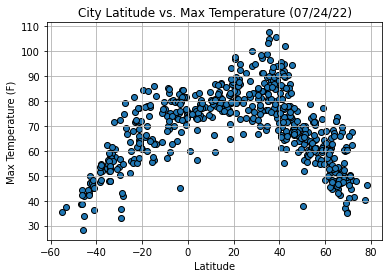

In [13]:
# Build scatter plot for latitude vs temperature
plt.scatter(City_Data["Lat"], 
            City_Data["Max Temp"],
            edgecolor="black", marker="o") 
            
# Add labels and title to plot
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.title("City Latitude vs. Max Temperature (%s)" % time.strftime("%x"))
plt.grid(which='major', linestyle='-')
plt.grid(which='minor', linestyle=':')

# Save the figure
plt.savefig("Latitude vs. Temperature Plot (F).png")

# Display plot
plt.show()



Given the run date of July 2022, Latitude vs. Temperature Plot show the relationship between latitude and temperature. This result indicates that there is a higher temperature for the cities that found near to the equater (Latitude 0). Which means as you closer to equator line(latitude 0) the temperature gets hotter.

## Latitude vs. Humidity Plot

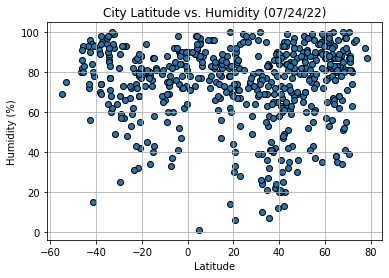

In [15]:
# Build the scatter plots for each city types
plt.scatter(City_Data["Lat"], 
            City_Data["Humidity"],
            edgecolor="black", marker="o")

# Add labels and title to plot
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.title("City Latitude vs. Humidity (%s)" % time.strftime("%x"))
plt.grid(which='major', linestyle='-')
plt.grid(which='minor', linestyle=':')

# Save the figure
plt.savefig("Latitude vs. Humidity.png")

# Display plot
plt.show()


This plot is looking at the relationship between latitude and humidity. It shows that there is not much of a correlation between latitude and humidity.

## Latitude vs. Cloudiness Plot

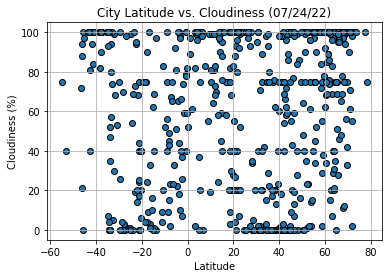

In [16]:
# Build the scatter plots for each city types
plt.scatter(City_Data["Lat"], 
            City_Data["Cloudiness"],
            edgecolor="black", marker="o")

# Add labels and title to plot
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.title("City Latitude vs. Cloudiness (%s)" % time.strftime("%x"))
plt.grid(which='major', linestyle='-')
plt.grid(which='minor', linestyle=':')

# Save the figure
plt.savefig("Latitude vs. Cloudiness.png")

# Display plot
plt.show()


The above scatter plot showed the relationship between the cities cloudness, and latitude.
From this result we can tell that the data is evenly distributed, and there is no difference in Cloudiness when the cities farther or nearer to the equater(Latitude 0).

## Latitude vs. Wind Speed Plot

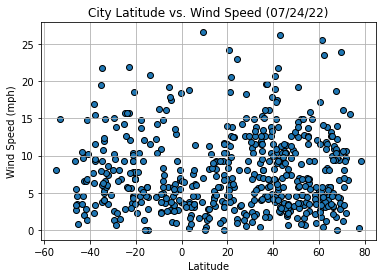

In [17]:
# Build the scatter plots for each city types
plt.scatter(City_Data["Lat"], 
            City_Data["Wind Speed"],
            edgecolor="black", marker="o")

# Add labels and title to plot
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.title("City Latitude vs. Wind Speed (%s)" % time.strftime("%x"))
plt.grid(which='major', linestyle='-')
plt.grid(which='minor', linestyle=':')

# Save the figure
plt.savefig("Latitude vs. Wind Speed (MPH) .png")

# Display plot
plt.show()


The above scatter plot showed the relationship between wind speed (mph), and latitude. 
The plot displayed the lower wind speed when the cities closer to the equater (latitude 0) and somehow the wind speed increase for the cities farther from the equater.

## Linear Regression

In [29]:
# OPTIONAL: Create a function to create Linear Regression plots
# Add the linear regression equation and line to plot
def linear_reg_plot(x_values,y_values,xytext,filename):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r-")
    plt.annotate(line_eq,(x_values.median(),y_values.median()),fontsize=15,color="red",xytext=xytext)
    plt.xlabel("Latitude")
    print(f"The r-value is: {rvalue}")
    plt.savefig(filename)
    plt.show()

In [30]:
# Create Northern and Southern Hemisphere DataFrames
northern_hemi_df = weather_data_pd.loc[(weather_data_pd["Lat"] >= 0)]
southern_hemi_df = weather_data_pd.loc[(weather_data_pd["Lat"] <0)]

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is: -0.6621900217958331


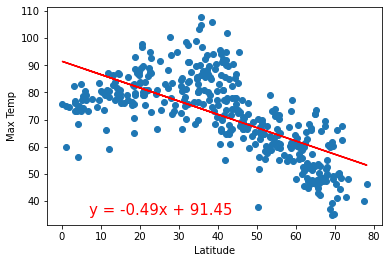

In [31]:
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
xytext=(7, 35)
#linear_reg_plot(x_values,y_values,xytext)
plt.ylabel("Max Temp")

# Save the figure
#plt.savefig("north_hemisphere Lat VS Max Temp .png")

(linear_reg_plot(x_values,y_values,xytext,"north_hemisphere Lat VS Max Temp .png"))



The above plot is a linear regression model between Maximum tempreture and latitude for Northern Hemisphere cities.
The result from the data showed that there is a strong, negative correlation between Maximum tempreture and latitude. These means when we go farther away from the equater(latitude 0) the maximum Temperature (F) will decrease.

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is: 0.7918787785089062


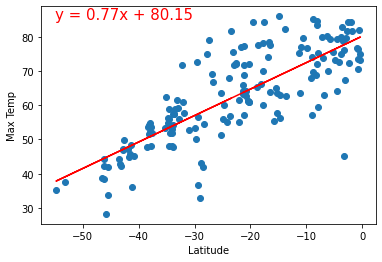

In [32]:
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
xytext=(-55, 85)
#linear_reg_plot(x_values,y_values,xytext)
plt.ylabel("Max Temp")

# Save the figure
#plt.savefig("south_hemisphere Lat VS Max Temp .png")

(linear_reg_plot(x_values,y_values,xytext,"south_hemisphere Lat VS Max Temp .png"))

The high r value indicates a strong positive correlation between latitude and max temperature.

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: 0.06199004866063333


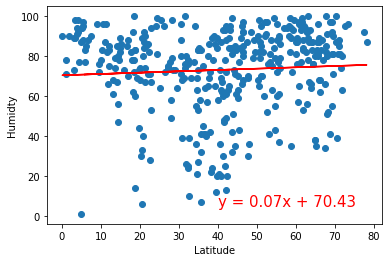

In [33]:
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
xytext=(40, 5)
#linear_reg_plot(x_values,y_values,xytext)
plt.ylabel("Humidty")

# Save the figure
#plt.savefig("north_hemisphere Lat VS Humidity.png")

(linear_reg_plot(x_values,y_values,xytext,"north_hemisphere Lat VS Humidity.png"))

The low r values indicate a weak to no relationship between humidity and latitude.

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: -0.141968009811303


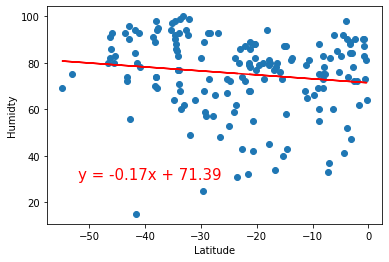

In [34]:
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
xytext=(-52, 30)
#linear_reg_plot(x_values,y_values,xytext)
plt.ylabel("Humidty")

# Save the figure
#plt.savefig("south_hemisphere Lat VS Humidity.png")

(linear_reg_plot(x_values,y_values,xytext,"south_hemisphere Lat VS Humidity.png"))

The above plot is a linear regression model between Humidity and Latitude for Southern Hemisphere cities. 
The result from the data showed that there is a weak, correlation between Humidity (%) and Latitude in the Southern Hemisphere cities. 

Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: 0.07551047442105448


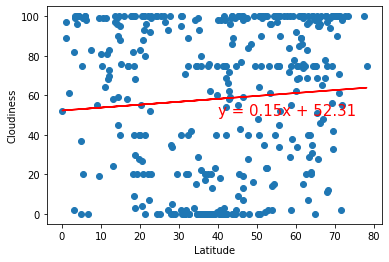

In [35]:
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
xytext=(40, 50)
#linear_reg_plot(x_values,y_values,xytext)
plt.ylabel("Cloudiness")

# Save the figure
#plt.savefig("north_hemisphere Lat VS Cloudiness.png")

(linear_reg_plot(x_values,y_values,xytext,"north_hemisphere Lat VS Cloudiness.png"))

For the Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression There does not seem to be much correlation .

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: -0.1894657485837974


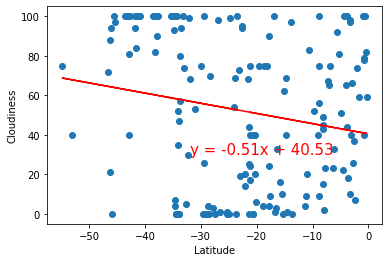

In [38]:
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
xytext=(-32, 30)
#linear_reg_plot(x_values,y_values,xytext)
plt.ylabel("Cloudiness")

# Save the figure
#plt.savefig("south_hemisphere Lat VS Cloudiness.png")

(linear_reg_plot(x_values,y_values,xytext,"south_hemisphere Lat VS Cloudiness.png"))

The above plot is a linear regression model between Cloudiness and for Southern Hemisphere cities. 
The result from the data showed that there is a very week, almost none negative correlation between Cloudiness (%) and Latitude in the Southern Hemisphere cities.

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: 0.059886100865453686


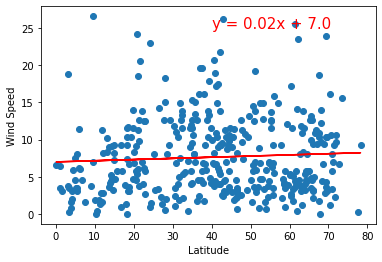

In [39]:
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
xytext=(40, 25)
#linear_reg_plot(x_values,y_values,xytext)
plt.ylabel("Wind Speed")

# Save the figure
#plt.savefig("north_hemisphere Lat VS Wind Speed .png")

(linear_reg_plot(x_values,y_values,xytext,"north_hemisphere Lat VS Wind Speed .png"))

The scatter plot map Northern cities' Wind Speed against their latitude. Cities selected randomly.

The result reveals no correlation between latitude and Wind Speed.

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: -0.010604154968293315


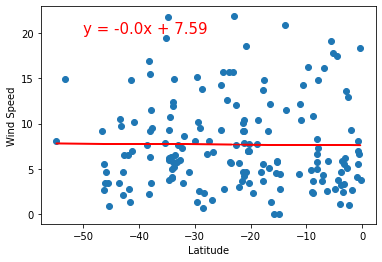

In [40]:
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
xytext=(-50, 20)
#linear_reg_plot(x_values,y_values,xytext)
plt.ylabel("Wind Speed")

# Save the figure
#plt.savefig("south_hemisphere Lat VS Wind Speed .png")

(linear_reg_plot(x_values,y_values,xytext,"south_hemisphere Lat VS Wind Speed .png"))

The scatter plot map Southern cities' Wind Speed against their latitude. Cities selected randomly.

The result reveals no correlation between latitude and Wind Speed.